In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('percentage-possible-sunshine-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_relative_humidity,mean_air_temperature,mean_wind_speed,total_sunshine_duration,solar_radiation,percentage_possible_sunshine
0,Jan-10,90.0,67,16.8,5.0,92.7,9.1,28
1,Feb-10,276.5,77,18.3,5.6,69.5,9.2,22
2,Mar-10,41.5,71,19.9,5.8,134.9,14.2,36
3,Apr-10,219.0,76,21.2,5.4,81.3,13.4,21
4,May-10,574.5,79,23.8,5.1,111.8,14.8,27


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.979624676027257


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[29.17046615 21.30883339 36.3298712  20.79822641 28.00535241 30.37165633
 35.89841874 45.74801832 53.67407159 33.4695836  31.7837769  37.5304041
 21.494898   29.81188924 24.90610566 46.83436693 19.01444378 45.285489
 58.21454063 49.8114679  52.40274849 32.57060868 24.44948524 24.20301222
 19.79168883 18.82551098 33.70741191 25.60334472 35.36808509 30.1512226
 60.04808484 40.93510095 41.61062042 44.86925606 34.65195549 30.34374584
 29.75823974 32.10146219 38.85179497 24.53088852 22.60056535 52.38782003
 67.25166915 61.18557762 53.01193656 36.17462612 35.9466091  29.0117153
 43.28329584 23.80546666 30.14981145 37.52341691 27.74616973 32.9025729
 57.73505604 45.15548893 58.35641929 46.97985675 39.33563445 27.83210344
 29.48635373 32.60987058 33.94246802 30.53033604 35.37162342 54.19967596
 49.66729421 42.64688162 53.88210745 48.0768277  40.61239007 32.36741322
 25.26943181 24.95676547 29.75068197 30.5207173  35.19988334 46.0620865
 62.77574698 58.37281711 36.54978033 

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 1.3629940852820188
Mean Squared Error: 2.8210640656930734
Root Mean Squared Error: 1.6796023534435385


Text(0.5, 1.0, 'Percentage possible sunshine - actual and predicted values')

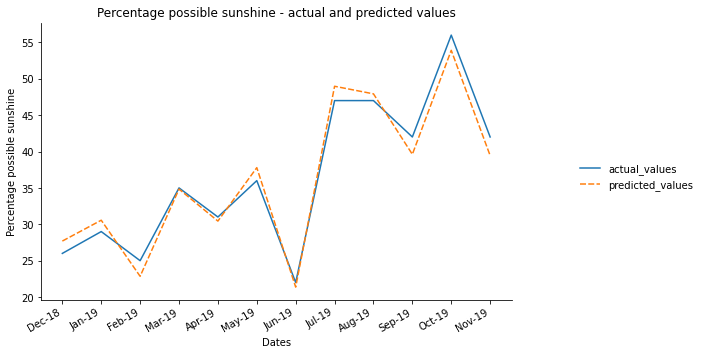

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Percentage possible sunshine') #set the label for the y-axis
plt.title('Percentage possible sunshine - actual and predicted values') #set the title of the graph